In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('data.csv', parse_dates=[0])
train, test = train_test_split(data, test_size=0.2) #разбиваем на обучающую и тестовую выборку

real_features = ['meanWidth', 'meanHeight', 'meanLength', 'meanVolume',
                 'countStacking', 'countTurnover', 'boxesCount',
                 'loadingWidth', 'loadingWidth', 'loadingLength']  # вещественные признаки
target_feature = 'density_percent'  # целевой признак

In [5]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(train[real_features], train[target_feature])  # обучаем

LinearRegression()

In [8]:
print('Оценки коэффициентов перед признаками:\n', model.coef_)

print('\nОценка свободного коэффициента:\n', model.intercept_)

test_preds = model.predict(test[real_features])

print('\nMSE =', round(np.sqrt(((test[target_feature] - test_preds) ** 2).mean()), 2))

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], test_preds), 2))

Оценки коэффициентов перед признаками:
 [ 2.15699609e-03  9.92026876e-03  2.40472231e-03 -1.36193859e-11
  9.38619803e-02  5.93467765e-03 -8.27092129e-02 -8.80288801e-03
 -8.80288801e-03  8.10667769e-04]

Оценка свободного коэффициента:
 90.67035504547657

MSE = 14.93
MAPE = 17.64


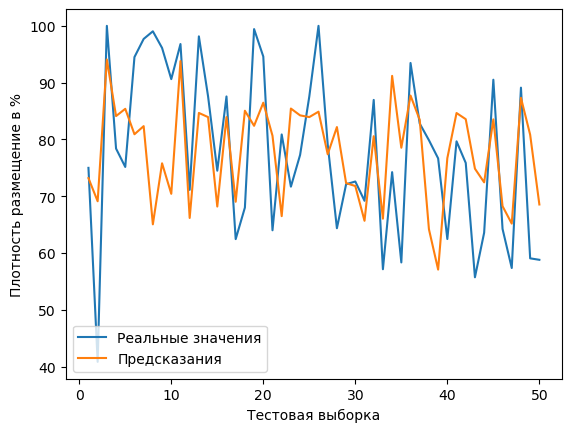

In [16]:
plt.plot(list(range(1, 51)), test[target_feature][:50],  label="Реальные значения")
plt.plot(list(range(1, 51)), test_preds[:50], label="Предсказания")
plt.legend(loc="lower left")
plt.ylabel("Плотность размещение в %")
plt.xlabel("Тестовая выборка")
plt.show()